In [1]:
import os
import shutil

import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Loading Images

#### Getting training data labels from 

In [2]:
train_ds = keras.preprocessing.image_dataset_from_directory('./4_project_data/train_imgs')

Found 13323 files belonging to 141 classes.


In [3]:
test_ds = keras.preprocessing.image_dataset_from_directory('./4_project_data/test_imgs', labels = None)

Found 484 files belonging to 1 classes.


In [4]:
classesNames = train_ds.class_names
print(classesNames)

['adhirasam', 'almonds', 'aloo_gobi', 'aloo_matar', 'aloo_methi', 'aloo_shimla_mirch', 'aloo_tikki', 'anarsa', 'apple', 'ariselu', 'avocado', 'banana', 'bandar_laddu', 'basundi', 'beer', 'bhatura', 'bhindi_masala', 'biryani', 'biscuits', 'boisson-au-glucose-50g', 'boondi', 'bread-french-white-flour', 'bread-sourdough', 'bread-white', 'bread-whole-wheat', 'bread-wholemeal', 'broccoli', 'butter', 'butter_chicken', 'carrot', 'chak_hao_kheer', 'cham_cham', 'chana_masala', 'chapati', 'cheese', 'chhena_kheeri', 'chicken', 'chicken_razala', 'chicken_tikka', 'chicken_tikka_masala', 'chikki', 'chips-french-fries', 'coffee-with-caffeine', 'corn', 'croissant', 'cucumber', 'daal_baati_churma', 'daal_puri', 'dal_makhani', 'dal_tadka', 'dark-chocolate', 'dharwad_pedha', 'doodhpak', 'double_ka_meetha', 'dum_aloo', 'egg', 'espresso-with-caffeine', 'french-beans', 'gajar_ka_halwa', 'gavvalu', 'ghevar', 'gruyere', 'gulab_jamun', 'ham-raw', 'hard-cheese', 'honey', 'imarti', 'jalebi', 'jam', 'kachori', 'k

## Configuring model

In [16]:
input_shape = 256

In [17]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(input_shape, input_shape, 3)),
    
    keras.layers.RandomFlip(),
    keras.layers.RandomRotation((0.4, 0.4)),
    keras.layers.RandomZoom((0.2, -0.2)),
    
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(141, activation='softmax')
    
])

In [18]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_2 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 random_rotation_2 (RandomRo  (None, 256, 256, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 256, 256, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 32)     

In [20]:
model.fit(x=train_ds, epochs=5)

Epoch 1/5
417/417 [==============================] - 60s 142ms/step - loss: 7.5976 - accuracy: 0.0668
Epoch 2/5
417/417 [==============================] - 60s 144ms/step - loss: 4.4478 - accuracy: 0.0910
Epoch 3/5
417/417 [==============================] - 61s 146ms/step - loss: 4.3408 - accuracy: 0.1069
Epoch 4/5
417/417 [==============================] - 63s 151ms/step - loss: 4.1621 - accuracy: 0.1238
Epoch 5/5
417/417 [==============================] - 62s 149ms/step - loss: 3.8996 - accuracy: 0.1502


In [21]:
perd = model.predict(test_ds)

16/16 [==============================] - 1s 61ms/step


In [22]:
print(len(perd))
pred1 = model.predict(test_ds.take(1))

484
1/1 [==============================] - 0s 285ms/step


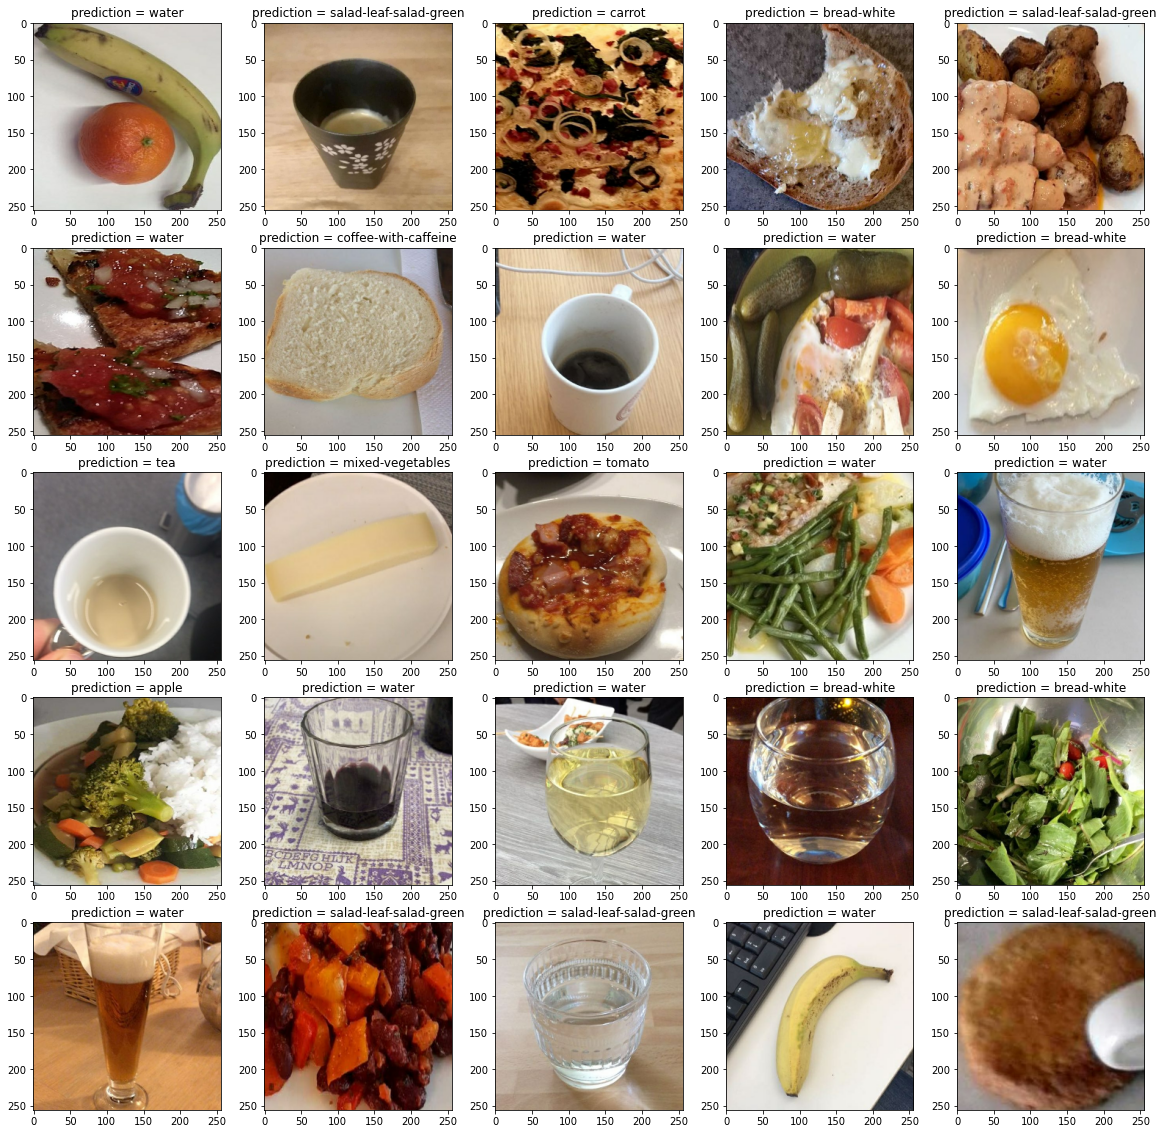

In [23]:
plt.figure(figsize=(20, 20))
for images in test_ds.take(1):
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f'prediction = {classesNames[np.argmax(pred1[i])]}')

In [24]:
model.save('Food Classification Neural Network.h5')

# Conclusion:
Model Need more data and training.
For now model's accuracy is pretty low.
* One reason for low accuracy is that there are so many classes (141 classes), but data is not sufficient for that many classes